# Question 1

[Chatlog](https://chatgpt.com/share/672d2cb6-a8fc-8001-b542-cdfa63080230)

Simple linear regression (SLR) invovles a linear relationship between a predictor variable (X) and an outcome variable (Y). 
- The outcome variable (Y) is also known as the dependent variable, it is the variable we aim to predict or explain. 
- The predictor variable (X) is the indpendent variable which influences the outcome variable. 
- The intercept (β0) is the baseline value of Y when X is zero. Mathematically, it's where the line intersects the Y-axis. It represents the starting level of outcome variable without any influence from the predictor. 
- The slope (β1) is the amount of change in Y responding to a corresponding one unit change in X. 
- Error Term (ϵ): This component accounts for the variability in Y that cannot be explained by X alone. It is the difference between the actual Y-value and the predicted Y value from the linear model. 
- The Simple linear regression equation is Y = β0+β1X+ϵ

How they combine to form a sample normal distribution
- Each observed Y deviates from this line by a random error term, 𝜖, assumed to be normally distributed with mean of 0 and variance of σ^2.
- For each X,Y values are normally distributed around the perdicted Y with a variance of σ^2. So,Y∣X∼N(β0+β1, σ^2)



In [ ]:
# Question 1 Code

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Set fixed theoretical model parameters
beta_0 = 5   # Intercept (baseline value of Y when X = 0)
beta_1 = 2   # Slope (expected increase in Y for each unit increase in X)
sigma = 3    # Standard deviation of the error term, representing variability around the line

# Create values of X (predictor variable) for our theoretical model
X = np.linspace(0, 10, 50)  # 50 values from 0 to 10

# Calculate the theoretical mean of Y for each X (based on our slope and intercept)
Y_theoretical = beta_0 + beta_1 * X

# Generate errors from a normal distribution with mean 0 and standard deviation sigma
errors = norm.rvs(loc=0, scale=sigma, size=X.shape[0])

# Calculate Y values as per the theoretical model with added normally distributed errors
Y_samples = Y_theoretical + errors

# Plotting the theoretical line and the sample data points generated by the model
plt.figure(figsize=(10, 6))
plt.plot(X, Y_theoretical, label='Theoretical Line (Expected Y)', color='blue', linestyle='--')
plt.scatter(X, Y_samples, color='orange', alpha=0.7, label='Sample Y values (with error)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Theoretical Simple Linear Regression Model with Normally Distributed Errors')
plt.legend()
plt.show()



# Question 2
[Chatlog](https://chatgpt.com/share/672d2cb6-a8fc-8001-b542-cdfa63080230)

Here's a guide for working through this example and answering each question:

### Step 1: Create a Simulated Dataset Based on the Theoretical Model

First, let's simulate data using our theoretical model. We’ll create \(X\) values and corresponding \(Y\) values with some added normal error, then store this data in a pandas DataFrame.

```python
import numpy as np
import pandas as pd

# Set the theoretical model parameters
beta_0 = 5  # Intercept
beta_1 = 2  # Slope
sigma = 3   # Standard deviation of the error term

# Simulate data for X and Y based on the theoretical model
np.random.seed(0)  # For reproducibility
X = np.linspace(0, 10, 50)
errors = np.random.normal(0, sigma, X.size)
Y = beta_0 + beta_1 * X + errors

# Combine X and Y into a pandas DataFrame
df = pd.DataFrame({'x': X, 'Y': Y})
```

### Step 2: Fitting the Model Using `statsmodels`

```python
import statsmodels.formula.api as smf  # This library is for specifying and fitting statistical models using formulas.

# Specify the model and fit it to the data
model_data_specification = smf.ols("Y ~ x", data=df)  # This defines a linear regression model where Y is regressed on x.
fitted_model = model_data_specification.fit()  # This fits the model to the data in df.
```

#### Explanation:
- `smf.ols()`: The `statsmodels.formula.api` library allows us to specify a model in a formulaic way, similar to R. `ols` stands for **Ordinary Least Squares**, the method used to fit the linear regression model.
- `model_data_specification`: This line specifies the linear regression model formula, saying \(Y\) is dependent on \(x\).
- `fitted_model`: This line fits the specified model to the data, estimating the coefficients.

### Step 3: Model Output Interpretation

```python
# Summary of the fitted model
fitted_model.summary()  # Provides a detailed summary of the model, including R-squared, coefficients, and p-values.
fitted_model.summary().tables[1]  # Displays the detailed coefficient estimates and their statistics in a table format.
fitted_model.params  # Provides the estimated coefficients (slope and intercept) for the model.
fitted_model.params.values  # Extracts the numerical values of the coefficients.
fitted_model.rsquared  # Provides the R-squared value, a measure of how well the model explains the variance in Y.
```

#### Explanation of Outputs:
- **`fitted_model.summary()`**: This provides a comprehensive summary of the model, including coefficients, confidence intervals, \(p\)-values, \(R^2\), and other fit statistics.
- **`fitted_model.summary().tables[1]`**: This table focuses specifically on the estimated coefficients, standard errors, t-statistics, and \(p\)-values for each term in the model.
- **`fitted_model.params`**: Provides the estimated values for the intercept and slope coefficients.
- **`fitted_model.params.values`**: Extracts the values from `params` in an array format, which can be helpful for direct computation.
- **`fitted_model.rsquared`**: The \(R^2\) statistic, indicating the proportion of variance in \(Y\) explained by \(X\).

### Step 4: Plotting the Data and Fitted Line

```python
import plotly.express as px

# Add a hack to include data in the legend
df['Data'] = 'Data'  # This creates a legend entry for the data points in the plot.

# Create scatter plot with fitted trendline
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x')

# This manually adds the trendline fitted by statsmodels
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png")  # Display the plot in a format suitable for GitHub/MarkUs
```

#### Explanation of Plotting Steps:
- **`df['Data'] = 'Data'`**: This creates a column with a single category, "Data", which is used for color coding the scatter plot. This lets us assign a color to the data points separately from the trendline.
- **`px.scatter`**: `plotly.express` is a high-level plotting library. Here, it creates a scatter plot with the `trendline='ols'` option, which automatically overlays an Ordinary Least Squares (OLS) regression line on the scatter plot of \(Y\) versus \(X\).
- **`fig.add_scatter()`**: This line adds the manually calculated regression line using the fitted values from `statsmodels`, ensuring the trendline is consistent with our fitted model.

### Explanation of Plot Types:
- **`px.scatter` with `trendline='ols'`**: This option in `plotly.express` automatically fits an OLS trendline using the underlying data.
- **`fig.add_scatter`**: Adds a custom line to the plot using fitted values.

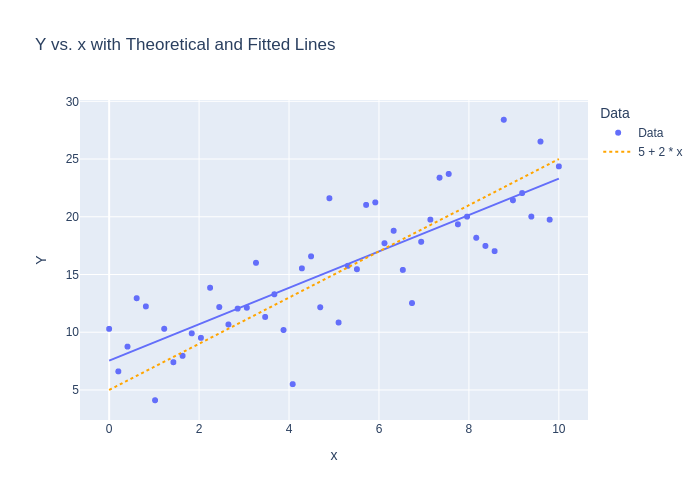

In [3]:
#Question 3 Code

import numpy as np
import pandas as pd
import plotly.express as px
import statsmodels.formula.api as smf

# Set the theoretical model parameters
beta_0 = 5  # Intercept
beta_1 = 2  # Slope
sigma = 3   # Standard deviation of the error term

# Simulate data for X and Y based on the theoretical model
np.random.seed(0)  # For reproducibility
X = np.linspace(0, 10, 50)
errors = np.random.normal(0, sigma, X.size)
Y = beta_0 + beta_1 * X + errors

# Combine X and Y into a pandas DataFrame
df = pd.DataFrame({'x': X, 'Y': Y})

# Specify the model and fit it to the data
model_data_specification = smf.ols("Y ~ x", data=df)
fitted_model = model_data_specification.fit()

# Theoretical line calculation (no fitting, just predefined slope and intercept)
x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta_0 + beta_1 * x_range  # Uses the original theoretical values

# Add a hack to include data in the legend
df['Data'] = 'Data'  # for legend labeling

# Create scatter plot with fitted trendline
fig = px.scatter(df, x='x', y='Y', color='Data', trendline='ols', title='Y vs. x with Theoretical and Fitted Lines')

# Add theoretical line to the plot
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=f'{beta_0} + {beta_1} * x', 
                line=dict(dash='dot', color='orange'))

# Display the plot
fig.show(renderer="png")  # USE this for submissions


# Question 3 Explanation

In this new code, both the theoretical and fitted line are visualized. The theoretical line uses predefined slope and intercept, without actually "fitting data", compared to the fitted line, which uses simulated data from question 1 to estimated the line, which introduces variability to the rnadom error added to Y values during simulation. By comparing these lines, it highlights the impact of random sampling variation. To elaborate, due to the random error term in the simulated data, the fitted line will not perfectly match the theoretical line. Each time we generate a new dataset, th fitted line will vary slightly because it reflects random sampling variation for each dataset. The most important takeaway is that even if we know the true population parameter, any dataset we collect will have some degree of randomness, which affects the estimated coefficients, and resulted in a fitted line that is similar but not exactly the same as the theoretical line. 

# Question 4 

Firstly, fitted_model.fittedvalues represents the predicted values of Y for each X in the dataset, according to the fitted Simple Linear Regression Model. These predictions are calculated using the estimated slope and intercept from fitted_model.parmas, which differs from theoretical value due to the reason above (sampling variations). For each X value in the dataset, we calculate the predict Y using the estamated model parameters. 

Contrast with Theoretical Model 
- Unlike the theoretical model, which uses fixed values 𝛽 0 β 0 ​ and 𝛽 1 β 1 ​ , the fitted model uses 𝛽 0 ^ β 0 ​ ^ ​ and 𝛽 1 ^ β 1 ​ ^ ​ derived from the sample data, accounting for sample-specific variability.

fitted_model.fittedvalues are derived by plugging each 
𝑋
X from the dataset into the fitted equation, using the estimated slope and intercept obtained from the model-fitting process. This allows us to make in-sample predictions of 
𝑌
Y that reflect the observed relationship in the specific dataset.



# Question 5
[Chatlog](https://chatgpt.com/share/672d2cb6-a8fc-8001-b542-cdfa63080230)

The **Ordinary Least Squares (OLS)** method finds the line that best fits the observed data by minimizing the **sum of the squared residuals**. Here’s a breakdown of what this means:

1. **Residuals**:
   - In a fitted model, the **residual** for each data point is the vertical distance between the observed \(Y\) value and the predicted \(Y\) value (from the regression line). It represents the portion of \(Y\) that is not explained by the predictor \(X\).
   - These residuals are shown as red dashed vertical lines in the plot, indicating the difference between each data point and the fitted line.

2. **Why Squaring the Residuals**:
   - **Square** the residuals to ensure all distances are positive, as positive and negative residuals would otherwise cancel each other out.
   - Squaring also places more weight on larger residuals, making the line more sensitive to points that are farther from it, which reduces overall error in a balanced way.

3. **Choosing the Fitted Line**:
   - OLS selects the line with the smallest possible **sum of squared residuals**. This is the line that minimizes the total distance (error) between the observed data points and the fitted line, providing the “best fit” based on the observed data.
   
4. **Result**:
   - The blue fitted line (`trendline='ols'`) is the result of this process, minimizing squared residuals and reflecting the observed data’s trend as closely as possible.

### Purpose of OLS and Residuals
By minimizing squared residuals, OLS finds a line that most accurately captures the data’s trend without being overly influenced by individual points.

# Question 6

[Chatlog](https://chatgpt.com/share/672d2cb6-a8fc-8001-b542-cdfa63080230)

To understand these expressions, let’s break down what **R-squared** represents in a Simple Linear Regression context and how each formula you provided captures it.

### What is R-squared?
**R-squared** (\( R^2 \)) is the **proportion of variation in the outcome \( Y \) that is explained by the model** (i.e., by the fitted values from the regression line). It measures how well the regression line fits the data, giving insight into the accuracy of the model.

In formula terms, \( R^2 \) is defined as:

\[
R^2 = 1 - \frac{\sum_{i=1}^n (Y_i - \hat{Y}_i)^2}{\sum_{i=1}^n (Y_i - \bar{Y})^2}
\]

where:
- \( Y_i \) are the observed values.
- \( \hat{Y}_i \) are the predicted (fitted) values from the model.
- \( \bar{Y} \) is the mean of the observed \( Y \) values.
- The **numerator** captures the **sum of squared residuals** (i.e., the squared distances between actual \( Y \) values and their predicted values by the model).
- The **denominator** captures the **total variation** in \( Y \) (i.e., the squared distances between each \( Y \) and its mean).

### Explanation of Each Expression

1. **First Expression**: `1 - ((Y - fitted_model.fittedvalues)**2).sum() / ((Y - Y.mean())**2).sum()`
   - This expression directly calculates \( R^2 \) by taking \( 1 \) minus the ratio of two sums of squares:
     - The **numerator** \(((Y - \text{fitted\_model.fittedvalues})^2).sum()\) is the sum of squared residuals, representing unexplained variation in \( Y \) by the model.
     - The **denominator** \(((Y - Y.mean())^2).sum()\) is the total variation in \( Y \) relative to its mean.
   - The ratio of these terms represents the **proportion of variation not explained by the model**. Subtracting this from \(1\) yields the **proportion of variation explained by the model**, which is exactly \( R^2 \).
   - **Interpretation**: The closer \( R^2 \) is to 1, the more of the variation in \( Y \) is explained by the model, indicating a better fit.

2. **Second Expression**: `fitted_model.rsquared`
   - This is the built-in calculation of \( R^2 \) provided by `statsmodels`. It directly outputs the value of \( R^2 \) as calculated by the OLS method, using the same formula as the first expression.
   - **Interpretation**: This measures the **accuracy** of the model in terms of how well the fitted values explain the variation in \( Y \).

3. **Third Expression**: `np.corrcoef(Y, fitted_model.fittedvalues)[0,1]**2`
   - This calculates the **square of the correlation coefficient** between \( Y \) and the fitted values.
   - In Simple Linear Regression, the **square of the correlation coefficient** between the observed \( Y \) and predicted \( Y \) values (fitted values) is equal to \( R^2 \). This happens because \( R^2 \) measures the proportion of shared variance between \( Y \) and its predictions.
   - **Interpretation**: This expression also represents \( R^2 \), the proportion of variance in \( Y \) explained by the fitted model.

4. **Fourth Expression**: `np.corrcoef(Y, x)[0,1]**2`
   - This calculates the **square of the correlation coefficient** between the original \( Y \) values and the predictor \( X \) values.
   - In Simple Linear Regression, where there is only one predictor, this squared correlation between \( Y \) and \( X \) is also equal to \( R^2 \). This is because in a single predictor model, all the explained variance in \( Y \) is due to \( X \).
   - **Interpretation**: This value also captures \( R^2 \) in the context of Simple Linear Regression, providing insight into the strength of the linear relationship between \( X \) and \( Y \).

### Summary of What Each Expression Captures

- All four expressions represent **\( R^2 \)** in a Simple Linear Regression context.
- **\( R^2 \)** is the **proportion of variation in \( Y \) that the model explains**. The higher the \( R^2 \), the more accurately the model describes the data.
- The **correlation squared** between \( Y \) and the fitted values or between \( Y \) and \( X \) (in a Simple Linear Regression setting) is also equal to \( R^2 \), giving a measure of the linear association's strength.

Thus, \( R^2 \) provides a measure of the model's accuracy, indicating how well the observed data points fit around the regression line.

# Question 7 

In Simple Linear Regression, the model assumes specific conditions for valid inference. Reviewing these assumptions against the example data on fertilizer use and crop yield, we can identify a few that don’t seem to hold:

### 1. **Linearity Assumption**:
   - **Assumption**: The relationship between \( X \) (Amount of Fertilizer) and \( Y \) (Crop Yield) is linear.
   - **Observation**: From the scatter plot, the relationship between fertilizer use and crop yield does not appear strictly linear, especially as fertilizer amounts increase. Yield increases more steeply at higher fertilizer levels, suggesting a possible nonlinear relationship. This violates the linearity assumption, as the model is attempting to fit a single straight line to a potentially curvilinear trend.

### 2. **Homoscedasticity (Constant Variance) Assumption**:
   - **Assumption**: The variance of the residuals (errors) is constant across all levels of \( X \).
   - **Observation**: Based on the scatter plot and residuals histogram, it appears that the spread of residuals increases as the fertilizer amount increases. This pattern indicates **heteroscedasticity**, where the variance of the residuals grows with the predictor variable. This means that the model’s accuracy may vary across levels of fertilizer, which contradicts the assumption of constant variance.

These two violations suggest that a Simple Linear Regression model may not be the best fit for this data, as it doesn’t adequately capture the underlying pattern in crop yield as fertilizer use increases.

# Question 8 

### Specifying the Null Hypothesis
In the context of Simple Linear Regression, a **null hypothesis** of "no linear association (on average)" implies that the **slope parameter** (\(\beta_1\)) of the regression model is zero. In this case, the hypothesis test would be:

\[
H_0: \beta_1 = 0 \quad \text{(no linear association between waiting time and duration)}
\]
\[
H_A: \beta_1 \neq 0 \quad \text{(there is a linear association between waiting time and duration)}
\]

This hypothesis implies that if \(\beta_1 = 0\), there is no linear relationship between the **waiting time** and the **eruption duration** for Old Faithful Geyser.

### Using the Code to Test the Hypothesis

The provided code loads the Old Faithful Geyser dataset, fits a Simple Linear Regression model to predict eruption duration based on waiting time, and summarizes the results.

```python
import seaborn as sns
import statsmodels.formula.api as smf

# Load the "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

# Specify and fit the linear regression model
linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()

# Display the summary of the fitted model
print(fitted_model.summary())
```

### Interpreting the Results

From the output of `fitted_model.summary()`, focus on:
- **Coefficient for `waiting` (Slope, \(\hat{\beta}_1\))**: Check the estimated value of \(\hat{\beta}_1\).
- **p-value for the `waiting` coefficient**: This p-value tests the null hypothesis \( H_0: \beta_1 = 0 \).

#### Interpretation of p-value in Hypothesis Testing:
1. **If p-value < 0.05** (for example):
   - **Reject \( H_0 \)**: We have **evidence of a linear association** between waiting time and eruption duration. 
   - **Conclusion**: For Old Faithful Geyser, there is a statistically significant linear relationship between the waiting time before an eruption and the duration of the eruption.

2. **If p-value > 0.05**:
   - **Fail to reject \( H_0 \)**: We do **not have sufficient evidence** to conclude a linear association between waiting time and eruption duration.
   - **Conclusion**: The data do not provide strong enough evidence to establish a linear relationship between waiting time and duration.

The strength of the evidence against the null hypothesis can be categorized as follows:
   - **No evidence** if \( \text{p-value} > 0.10 \)
   - **Weak evidence** if \( 0.05 < \text{p-value} \leq 0.10 \)
   - **Moderate evidence** if \( 0.01 < \text{p-value} \leq 0.05 \)
   - **Strong evidence** if \( 0.001 < \text{p-value} \leq 0.01 \)
   - **Very strong evidence** if \( \text{p-value} \leq 0.001 \)

After obtaining the p-value from the output, interpret it according to the strength categories above to assess the presence of a linear association in the Old Faithful dataset.

# Question 9
1. short_wait_limit: Defining short wait time by setting a limit.Therefore, we'll only look at those wait times less than this limit. 62, 64, 66 minutes, 

2. Flitering the data: This line creates a new variable called short_wait, which will only the data points where the wait is less than short_wait_limit. The code snippet is print(smf.ols('duration~waiting',data=old_faithful[short_wait]).fit().summary().tables[1]). 

3. Running a linear regression: By conducting a linear regression, you can see if a connection between waiting time and duartion. The code outputs a slope and a p-value, which shows if there is strong enough evidence against null hypothesis. 
- Code snippet: # Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration',
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")",
                 trendline='ols')

4. Plotting the data by creating a scatter plots. With the code trendline = 'ols' options adds a line that shows overall trend or patern. By doing this, it allows you to see a clear pattern 
- Code snippet: fig.show() # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Characterizing Evidence Against Null Hypothesis is that there is no relationship between waiting time and duration. 
- A significant slope coefficient would indicate a relationshiop between waiting time and duration. 
- P-value associated with the slop tests whether this relationship is statistically significant. 

Interpreting p-value
- p > 0.10: No evidence against the null hypothesis.
- 0.05 < p < 0.10: Weak evidence against the null hypothesis.
- 0.01 < p < 0.05: Moderate evidence against the null hypothesis.
- 0.001 < p < 0.01: Strong evidence against the null hypothesis.
- p < 0.001: Very strong evidence against the null hypothesis.


# Question 10

[Chatlog](https://chatgpt.com/share/672d2cb6-a8fc-8001-b542-cdfa63080230)

Here’s a simplified breakdown of the instructions in the image for analyzing long wait times (n = 160):
	1.	Create Bootstrap Models and Collect Slope Coefficients:
	•	Use the Simple Linear Regression model on bootstrap samples (resampled versions of the data) to get an estimate of the slope each time.
	•	Repeat this process to create many bootstrap samples, collect the slope coefficients from each model, and visualize the distribution of these slopes. This collection of slopes shows the variability in the slope estimate based on repeated sampling.
	2.	Simulate Samples Under the Null Hypothesis:
	•	Generate simulated data assuming there is no real relationship between waiting time and duration.
	•	Set specific values for the model:
	•	Intercept (beta_0) = 1.65 (average duration)
	•	Slope (beta_1) = 0 (no relationship)
	•	Standard deviation (sigma) = 0.37
	•	This creates simulated samples under the assumption that waiting time does not affect eruption duration. From these samples, collect slope coefficients and visualize this simulated distribution, representing what we’d expect under the null hypothesis.
	3.	Confidence Interval and Hypothesis Test:
	•	Check if 0 is within the 95% confidence interval of the bootstrapped slopes. This interval shows the range of slopes that are plausible based on our sample data.
	•	Compare the slope from the actual data model (smf.ols('duration ~ waiting', data=old_faithful[long_wait])) to the simulated slope distribution. This gives a p-value, which tells us if the observed slope is unusual under the null hypothesis (no relationship).

Key Points:

	•	Bootstrapped Slopes: Show variability in the slope estimate if the data is resampled multiple times.
	•	Simulated Slopes (Null Hypothesis): Represent slope values we’d expect if there were no real relationship.
	•	Confidence Interval and P-Value: Help determine if the actual slope is statistically different from zero (indicating a possible real relationship between waiting time and duration).

# Question 11

- Simply the classifications by making times less than 68 minute short and wait time longer than 68 mintues long. 
- Indicator variable model to present thekind of wait time. 

Differeneces
- This model looked at entire datset, treating waiting time as a continuous variable. It measured the overall trend between waiting time and eruptiond duartion. 
- Restricted analysis to "short" waits using a threshold of 64 other values.Code snippet: (smf.ols('duration ~ waiting', data=old_faithful[short_wait]))
- Restricted analysis to long wait (threshold 71 minutes) (smf.ols('duration ~ waiting', data=old_faithful[long_wait])

- Null hypothesis is that there is no difference in eruption duration between short and long waits on average. 
- If the p-value for the treatment coefficient is low (<0.05), it is statistically significant. 
- Use px.box to see the distributions of durations for "short" and "long" waits side by side.

# Question 12
[Chatlog](https://chatgpt.com/share/672d2cb6-a8fc-8001-b542-cdfa63080230)

To evaluate the plausibility of the **normality assumption of error terms** for each model, we can examine the **shape of the residuals' histograms**. The assumption is best met if the histogram of residuals resembles a **normal distribution**, ideally matching the overlaid normal distribution curve.

Here’s a concise assessment of each histogram in terms of the normality assumption:

1. **Model 1 (All Data using Slope)**:
   - This histogram would support the normality assumption if it is roughly symmetric, bell-shaped, and closely follows the overlaid normal distribution curve.
   - **Interpretation**: If Model 1’s residuals closely match the normal curve, it would suggest that the error terms for this model are approximately normally distributed.

2. **Model 2 (Short Wait Data)**:
   - This histogram may display skewness or irregular peaks if the residuals do not follow a normal distribution.
   - **Interpretation**: If the residuals in Model 2 significantly deviate from the normal curve (e.g., are skewed or have excess kurtosis), it suggests the error terms for this model are **not normally distributed**.

3. **Model 3 (Long Wait Data)**:
   - Similarly, if this histogram shows asymmetry, heavy tails, or peaks, it indicates a deviation from normality.
   - **Interpretation**: A non-normal shape in Model 3’s residuals would suggest that the error terms for this model do not satisfy the normality assumption.

4. **Model 4 (All Data using Indicator Variable)**:
   - This model uses an indicator variable, potentially capturing a different relationship type. The histogram may show two distinct peaks (bimodality) if the data segments differently by group, deviating from a single-peaked normal distribution.
   - **Interpretation**: Bimodality or skewness in Model 4’s residuals would indicate that the error terms are not normally distributed, making this model unsuitable for the normality assumption.

### Conclusion
The histogram that closely resembles a **symmetric, bell-shaped curve** aligned with the overlaid normal distribution curve best supports the normality assumption for error terms. The other histograms that show skewness, heavy tails, or multiple peaks indicate that their models' error terms do not follow a normal distribution, thus violating the normality assumption for Simple Linear Regression.

# Question 13

Here's the complete solution for performing (A) a permutation test and (B) bootstrapping to create a 95% confidence interval for the difference in means of "short" and "long" wait times in the Old Faithful dataset, along with explanations:

```python
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# Load the Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Separate the dataset into "short" and "long" wait times based on a threshold
long_wait_limit = 71
old_faithful['kind'] = np.where(old_faithful['waiting'] > long_wait_limit, 'long', 'short')

# Observed difference in means
observed_mean_diff = old_faithful.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]

# (A) Permutation Test
n_permutations = 1000
permutation_diffs = []

for _ in range(n_permutations):
    # Shuffle the 'kind' labels
    shuffled_data = old_faithful.assign(kind_shuffled=old_faithful['kind'].sample(frac=1, replace=False).values)
    
    # Calculate the mean difference for the shuffled labels
    shuffled_mean_diff = shuffled_data.groupby('kind_shuffled')['duration'].mean().iloc[::-1].diff().values[1]
    permutation_diffs.append(shuffled_mean_diff)

# Calculate the p-value based on the permutation distribution
permutation_diffs = np.array(permutation_diffs)
p_value = (np.abs(permutation_diffs) >= np.abs(observed_mean_diff)).mean()

# (B) Bootstrap Confidence Interval for the Difference in Means
n_bootstraps = 1000
bootstrapped_mean_diffs = []

for _ in range(n_bootstraps):
    # Resample within each 'kind' group
    bootstrapped_data = old_faithful.groupby('kind').apply(lambda x: x.sample(n=len(x), replace=True)).reset_index(drop=True)
    
    # Calculate the difference in means for the bootstrapped samples
    bootstrapped_mean_diff = bootstrapped_data.groupby('kind')['duration'].mean().iloc[::-1].diff().values[1]
    bootstrapped_mean_diffs.append(bootstrapped_mean_diff)

# Calculate the 95% bootstrap confidence interval
bootstrapped_mean_diffs = np.array(bootstrapped_mean_diffs)
bootstrap_ci = np.quantile(bootstrapped_mean_diffs, [0.025, 0.975])

# Output results
print("Observed Mean Difference:", observed_mean_diff)
print("Permutation Test p-value:", p_value)
print("95% Bootstrap Confidence Interval for Mean Difference:", bootstrap_ci)
```

### Explanation of Code

#### (A) Permutation Test
1. **Shuffling the Labels**:
   - In each permutation, we shuffle the labels ("short" or "long") of the observations to simulate the null hypothesis that there is no difference in mean duration between the two groups.
2. **Mean Difference Calculation**:
   - For each permutation, we calculate the mean difference in durations between the "shuffled" groups.
3. **p-value Calculation**:
   - After running the permutations, we calculate the p-value as the proportion of permuted mean differences that are as extreme or more extreme than the observed mean difference. This provides evidence against the null hypothesis if the p-value is small.

#### (B) Bootstrap Confidence Interval for the Difference in Means
1. **Bootstrapping Within Groups**:
   - In each bootstrap iteration, we resample with replacement within each group ("short" and "long").
2. **Mean Difference Calculation**:
   - For each bootstrap sample, we calculate the difference in mean durations between the "short" and "long" groups.
3. **Confidence Interval Calculation**:
   - After running the bootstraps, we calculate the 95% confidence interval as the 2.5th and 97.5th percentiles of the bootstrapped mean differences. This interval estimates the range of plausible values for the true difference in means between the two groups.

### (a) Explanation of Sampling Approaches

- **Permutation Test**:
  - Simulates the null hypothesis by assuming there is no association between group labels ("short" and "long") and eruption duration. It tests if the observed difference could reasonably occur by chance if there were no real difference between the groups.
  - **Interpretation**: If the p-value is low, we have evidence that the observed difference is unlikely under the null hypothesis, suggesting a real difference between the groups.

- **Bootstrap Confidence Interval**:
  - Estimates the uncertainty around the observed difference by resampling within each group. It creates a range of plausible values for the true difference in means.
  - **Interpretation**: If 0 is not within the 95% confidence interval, it suggests that the difference in means is statistically significant.

### (b) Comparison with the Indicator Variable Model (Question 11)

- **Similarity**:
  - Both methods (permutation test and bootstrap) aim to assess whether there is a meaningful difference in durations between "short" and "long" wait times.
  - Like the indicator variable model, both methods evaluate the difference between groups.

- **Differences**:
  - The **indicator variable model** (from Question 11) includes an indicator variable directly in a regression model to assess differences in mean durations by group. It assumes linearity and uses residuals to test the model fit.
  - The **permutation test** and **bootstrap** methods, however, are non-parametric. They do not rely on the assumptions of linear regression or normally distributed residuals. Instead, they rely on sampling distributions to estimate significance and confidence intervals.

### Summary of Results Interpretation

- If the permutation test p-value is low, we have evidence against the null hypothesis, suggesting a difference in mean durations between the two groups.
- If the 95% bootstrap confidence interval does not contain 0, it suggests a statistically significant difference in means.

# Question 14 

Yes I have indeed reviewed the course textbook. I find the instructions quiet confusing at first but figured out how to solve it when looking at Piazza.